In [3]:
import pm4py
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def compute_case_duration(df):
    df ['Duration'] = df['End Date'] -  df['Start Date']
    
    case_durations = df.groupby('Case ID')['Duration'].sum()
    
    return case_durations;


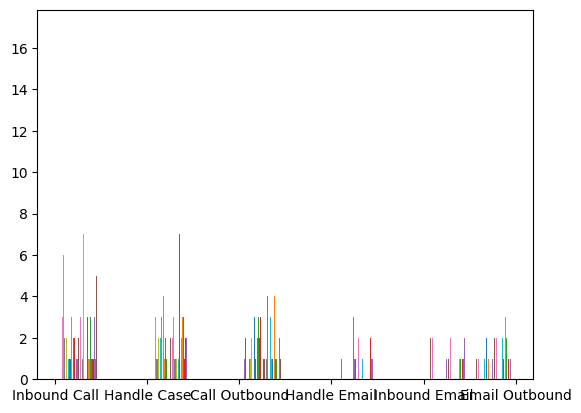

3885

In [24]:
# importazione dati:
dF = pd.read_csv('https://raw.githubusercontent.com/paoloceravolo/BIS2022/main/Event%20Logs/CallCenterLog.csv',sep=',')
dF = pm4py.format_dataframe(dF, case_id='Case ID', activity_key='Activity', start_timestamp_key='Start Date', timestamp_key='End Date')
event_log = pm4py.convert_to_event_log(dF)
variants = pm4py.get_variants(event_log)
variants
plt.hist(variants)
plt.show()
len(event_log)

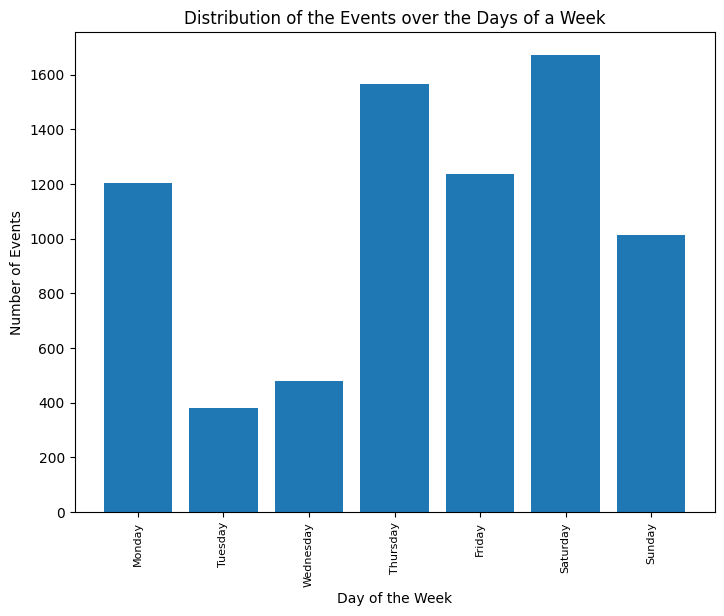

In [39]:
pm4py.view_events_distribution_graph(event_log, distr_type="days_week", format="png")

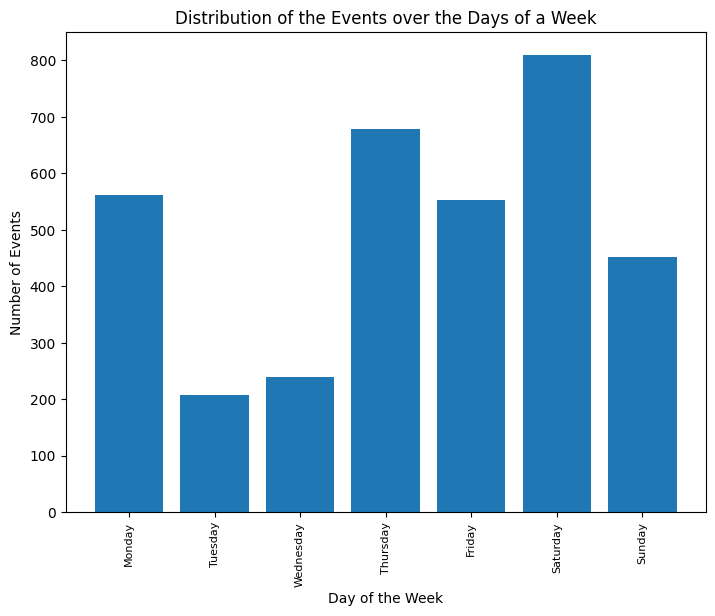

2925

In [40]:
# filtrare i dati per un le top k varianti
# occhio ad utilizzarlo, usalo solo per rimuovere il rumore e devi essere sicuro di eliminare il rumore
top_k_variants = pm4py.filter_variants_top_k(event_log, 4)
pm4py.view_events_distribution_graph(top_k_variants, distr_type="days_week", format="png")
len(top_k_variants)

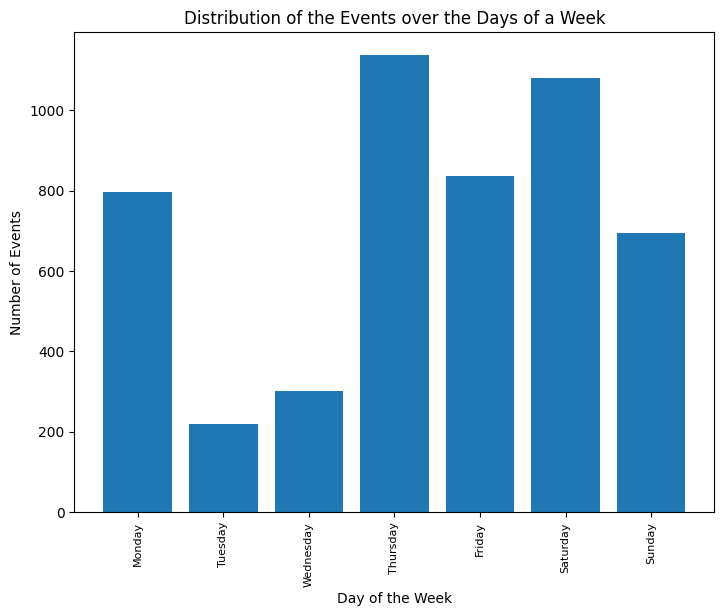

1403

In [41]:
# filtrare i dati per la taglia
size_variants = pm4py.filter_case_size(event_log, 2, 1000)
pm4py.view_events_distribution_graph(size_variants, distr_type="days_week", format="png")
len(size_variants)

In [43]:
dataframe = pm4py.convert_to_dataframe(size_variants)
dataframe.head()

,Case ID,Activity,Start Date,End Date,Agent Position,Customer ID,Topic,Service Type,Resource,concept:name,time:timestamp,@@index,@@case_index,start_timestamp,case:concept:name,case:@@index
0,Case 1,Inbound Call,2010-09-03 08:05:00+00:00,2010-09-03 08:10:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Inbound Call,2010-09-03 08:10:00+00:00,0,0,2010-09-03 08:05:00+00:00,Case 1,1308
1,Case 1,Handle Case,2010-11-03 10:30:00+00:00,2010-11-03 10:32:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Handle Case,2010-11-03 10:32:00+00:00,1,0,2010-11-03 10:30:00+00:00,Case 1,1308
2,Case 1,Call Outbound,2010-11-03 11:45:00+00:00,2010-11-03 11:52:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Henk,Call Outbound,2010-11-03 11:52:00+00:00,2,0,2010-11-03 11:45:00+00:00,Case 1,1308
3,Case 1000,Inbound Call,2010-04-03 14:11:00+00:00,2010-04-03 14:12:00+00:00,FL,Customer 837,Queries,Product Assistance,Mary,Inbound Call,2010-04-03 14:12:00+00:00,5,3,2010-04-03 14:11:00+00:00,Case 1000,1069
4,Case 1000,Handle Case,2010-04-03 14:12:00+00:00,2010-04-03 14:13:00+00:00,FL,Customer 837,Queries,Product Assistance,Mary,Handle Case,2010-04-03 14:13:00+00:00,6,3,2010-04-03 14:12:00+00:00,Case 1000,1069


In [ ]:
# try to remove the negative duration!!!

In [49]:
# Identificare le attivitá non frequenti:
dF.groupby('concept:name').size()

concept:name
Call Outbound      661
Email Outbound     544
Handle Case        931
Handle Email       564
Inbound Call      4361
Inbound Email      487
dtype: int64

In questo caso non ci sono davvero delle attivitá poco frequenti. Ricorda che le top variants sono diverse dal numero di attivitá!

In [50]:
# Ora concentrati su quelle nulle:
dF.isnull().sum()

Case ID              0
Activity             0
Start Date           0
End Date             0
Agent Position       0
Customer ID          0
Topic                0
Service Type         0
Resource             0
case:concept:name    0
concept:name         0
time:timestamp       0
@@index              0
@@case_index         0
start_timestamp      0
dtype: int64

In questo caso non ci sono valori nulli!

In [77]:
# filtro tempi negativi
compute_case_duration(dF)
no_zero_duration = dF[dF['Duration'] > pd.Timedelta(0)]
no_zero_duration

,Case ID,Activity,Start Date,End Date,Agent Position,Customer ID,Topic,Service Type,Resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,start_timestamp,Duration
0,Case 1,Inbound Call,2010-09-03 08:05:00+00:00,2010-09-03 08:10:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Case 1,Inbound Call,2010-09-03 08:10:00+00:00,0,0,2010-09-03 08:05:00+00:00,0 days 00:05:00
1,Case 1,Handle Case,2010-11-03 10:30:00+00:00,2010-11-03 10:32:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Case 1,Handle Case,2010-11-03 10:32:00+00:00,1,0,2010-11-03 10:30:00+00:00,0 days 00:02:00
2,Case 1,Call Outbound,2010-11-03 11:45:00+00:00,2010-11-03 11:52:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Henk,Case 1,Call Outbound,2010-11-03 11:52:00+00:00,2,0,2010-11-03 11:45:00+00:00,0 days 00:07:00
3,Case 10,Handle Email,2010-03-27 11:29:00+00:00,2010-03-27 11:30:00+00:00,FL,Customer 10,Queries,Product Assistance,Jochem,Case 10,Handle Email,2010-03-27 11:30:00+00:00,3,1,2010-03-27 11:29:00+00:00,0 days 00:01:00
4,Case 100,Inbound Call,2010-03-21 11:25:00+00:00,2010-03-21 11:26:00+00:00,FL,Customer 3,Queries,Product Assistance,Karen,Case 100,Inbound Call,2010-03-21 11:26:00+00:00,4,2,2010-03-21 11:25:00+00:00,0 days 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543,Case 996,Inbound Call,2010-06-03 11:17:00+00:00,2010-06-03 11:19:00+00:00,FL,Customer 834,Reservations Pro,Referred to Servicer,Wil,Case 996,Inbound Call,2010-06-03 11:19:00+00:00,7543,3881,2010-06-03 11:17:00+00:00,0 days 00:02:00
7544,Case 997,Inbound Call,2010-03-25 08:15:00+00:00,2010-03-25 08:23:00+00:00,FL,Customer 835,Queries,Referred to Servicer,Richard,Case 997,Inbound Call,2010-03-25 08:23:00+00:00,7544,3882,2010-03-25 08:15:00+00:00,0 days 00:08:00
7545,Case 997,Inbound Call,2010-03-25 16:26:00+00:00,2010-03-25 16:29:00+00:00,FL,Customer 835,Queries,Referred to Servicer,Ton,Case 997,Inbound Call,2010-03-25 16:29:00+00:00,7545,3882,2010-03-25 16:26:00+00:00,0 days 00:03:00
7546,Case 998,Inbound Call,2010-03-29 15:53:00+00:00,2010-03-29 15:57:00+00:00,FL,Customer 3,Queries,Product Assistance,Clark,Case 998,Inbound Call,2010-03-29 15:57:00+00:00,7546,3883,2010-03-29 15:53:00+00:00,0 days 00:04:00


In [78]:
# mille righe in meno di:
dF

,Case ID,Activity,Start Date,End Date,Agent Position,Customer ID,Topic,Service Type,Resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,start_timestamp,Duration
0,Case 1,Inbound Call,2010-09-03 08:05:00+00:00,2010-09-03 08:10:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Case 1,Inbound Call,2010-09-03 08:10:00+00:00,0,0,2010-09-03 08:05:00+00:00,0 days 00:05:00
1,Case 1,Handle Case,2010-11-03 10:30:00+00:00,2010-11-03 10:32:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Case 1,Handle Case,2010-11-03 10:32:00+00:00,1,0,2010-11-03 10:30:00+00:00,0 days 00:02:00
2,Case 1,Call Outbound,2010-11-03 11:45:00+00:00,2010-11-03 11:52:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Henk,Case 1,Call Outbound,2010-11-03 11:52:00+00:00,2,0,2010-11-03 11:45:00+00:00,0 days 00:07:00
3,Case 10,Handle Email,2010-03-27 11:29:00+00:00,2010-03-27 11:30:00+00:00,FL,Customer 10,Queries,Product Assistance,Jochem,Case 10,Handle Email,2010-03-27 11:30:00+00:00,3,1,2010-03-27 11:29:00+00:00,0 days 00:01:00
4,Case 100,Inbound Call,2010-03-21 11:25:00+00:00,2010-03-21 11:26:00+00:00,FL,Customer 3,Queries,Product Assistance,Karen,Case 100,Inbound Call,2010-03-21 11:26:00+00:00,4,2,2010-03-21 11:25:00+00:00,0 days 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543,Case 996,Inbound Call,2010-06-03 11:17:00+00:00,2010-06-03 11:19:00+00:00,FL,Customer 834,Reservations Pro,Referred to Servicer,Wil,Case 996,Inbound Call,2010-06-03 11:19:00+00:00,7543,3881,2010-06-03 11:17:00+00:00,0 days 00:02:00
7544,Case 997,Inbound Call,2010-03-25 08:15:00+00:00,2010-03-25 08:23:00+00:00,FL,Customer 835,Queries,Referred to Servicer,Richard,Case 997,Inbound Call,2010-03-25 08:23:00+00:00,7544,3882,2010-03-25 08:15:00+00:00,0 days 00:08:00
7545,Case 997,Inbound Call,2010-03-25 16:26:00+00:00,2010-03-25 16:29:00+00:00,FL,Customer 835,Queries,Referred to Servicer,Ton,Case 997,Inbound Call,2010-03-25 16:29:00+00:00,7545,3882,2010-03-25 16:26:00+00:00,0 days 00:03:00
7546,Case 998,Inbound Call,2010-03-29 15:53:00+00:00,2010-03-29 15:57:00+00:00,FL,Customer 3,Queries,Product Assistance,Clark,Case 998,Inbound Call,2010-03-29 15:57:00+00:00,7546,3883,2010-03-29 15:53:00+00:00,0 days 00:04:00


In [83]:
start_activities = pm4py.get_start_activities(no_zero_duration)
end_activities = pm4py.get_end_activities(no_zero_duration)

import json

print('start of activities', json.dumps(start_activities, indent=4))
print('end of activities', json.dumps(end_activities, indent=4))

start of activities {
    "Inbound Call": 3084,
    "Handle Email": 157,
    "Inbound Email": 314,
    "Handle Case": 89,
    "Call Outbound": 71,
    "Email Outbound": 40
}
end of activities {
    "Call Outbound": 199,
    "Handle Email": 129,
    "Inbound Call": 2894,
    "Handle Case": 248,
    "Email Outbound": 271,
    "Inbound Email": 14
}


In [84]:
# filtro attivitá per inizio! Solamente con inbound call o mail. Rimuovo altre 1000 righe!!
filtered_log = pm4py.filter_start_activities(no_zero_duration, ["Inbound Call", "Inbound Email"])
filtered_log

,Case ID,Activity,Start Date,End Date,Agent Position,Customer ID,Topic,Service Type,Resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,start_timestamp,Duration
0,Case 1,Inbound Call,2010-09-03 08:05:00+00:00,2010-09-03 08:10:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Case 1,Inbound Call,2010-09-03 08:10:00+00:00,0,0,2010-09-03 08:05:00+00:00,0 days 00:05:00
1,Case 1,Handle Case,2010-11-03 10:30:00+00:00,2010-11-03 10:32:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Case 1,Handle Case,2010-11-03 10:32:00+00:00,1,0,2010-11-03 10:30:00+00:00,0 days 00:02:00
2,Case 1,Call Outbound,2010-11-03 11:45:00+00:00,2010-11-03 11:52:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Henk,Case 1,Call Outbound,2010-11-03 11:52:00+00:00,2,0,2010-11-03 11:45:00+00:00,0 days 00:07:00
4,Case 100,Inbound Call,2010-03-21 11:25:00+00:00,2010-03-21 11:26:00+00:00,FL,Customer 3,Queries,Product Assistance,Karen,Case 100,Inbound Call,2010-03-21 11:26:00+00:00,4,2,2010-03-21 11:25:00+00:00,0 days 00:01:00
5,Case 1000,Inbound Call,2010-04-03 14:11:00+00:00,2010-04-03 14:12:00+00:00,FL,Customer 837,Queries,Product Assistance,Mary,Case 1000,Inbound Call,2010-04-03 14:12:00+00:00,5,3,2010-04-03 14:11:00+00:00,0 days 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543,Case 996,Inbound Call,2010-06-03 11:17:00+00:00,2010-06-03 11:19:00+00:00,FL,Customer 834,Reservations Pro,Referred to Servicer,Wil,Case 996,Inbound Call,2010-06-03 11:19:00+00:00,7543,3881,2010-06-03 11:17:00+00:00,0 days 00:02:00
7544,Case 997,Inbound Call,2010-03-25 08:15:00+00:00,2010-03-25 08:23:00+00:00,FL,Customer 835,Queries,Referred to Servicer,Richard,Case 997,Inbound Call,2010-03-25 08:23:00+00:00,7544,3882,2010-03-25 08:15:00+00:00,0 days 00:08:00
7545,Case 997,Inbound Call,2010-03-25 16:26:00+00:00,2010-03-25 16:29:00+00:00,FL,Customer 835,Queries,Referred to Servicer,Ton,Case 997,Inbound Call,2010-03-25 16:29:00+00:00,7545,3882,2010-03-25 16:26:00+00:00,0 days 00:03:00
7546,Case 998,Inbound Call,2010-03-29 15:53:00+00:00,2010-03-29 15:57:00+00:00,FL,Customer 3,Queries,Product Assistance,Clark,Case 998,Inbound Call,2010-03-29 15:57:00+00:00,7546,3883,2010-03-29 15:53:00+00:00,0 days 00:04:00


### Fine filtraggio iniziale

### Inizio rimozione rumore

Mean duration 2 days 16:59:26.362566215
Median duration 0 days 00:04:00
Mode duration 60000000000 nanoseconds
STDev duration 14 days 14:39:20.208515005
Mean duration 233966.36256621542
Median duration 240.0
Mode duration 60
STDev duration 1262360.2085150061


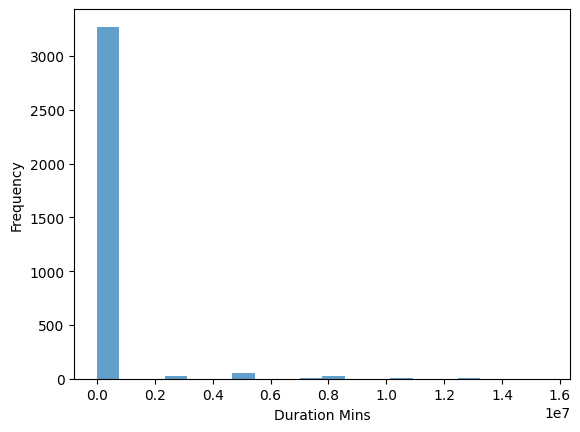

In [112]:
def print_duration_frequency(case_dur):
    
    case_dur = case_dur.dt.total_seconds().astype(int)
    
    print('Mean duration', case_dur.mean())
    print('Median duration', case_dur.median())
    print('Mode duration', case_dur.mode().values[0])
    print('STDev duration', case_dur.std())

    plt.hist(case_dur, bins=20, alpha=0.7)
    plt.xlabel('Duration Mins')
    plt.ylabel('Frequency')
    plt.show()
    
case_dur = filtered_log.groupby('Case ID')['Duration'].sum()
print('Mean duration', case_dur.mean())
print('Median duration', case_dur.median())
print('Mode duration', case_dur.mode().values[0])
print('STDev duration', case_dur.std())

# va convertito...
print_duration_frequency(case_dur)
# case_dur = case_dur.dt.total_seconds().astype(int)
# plt.hist(case_dur, bins=20, alpha=0.7)
# plt.xlabel('Duration Mins')
# plt.ylabel('Frequency')
# plt.show()
# ancora una volta, la maggioranza dei casi ha una durata piccolissima

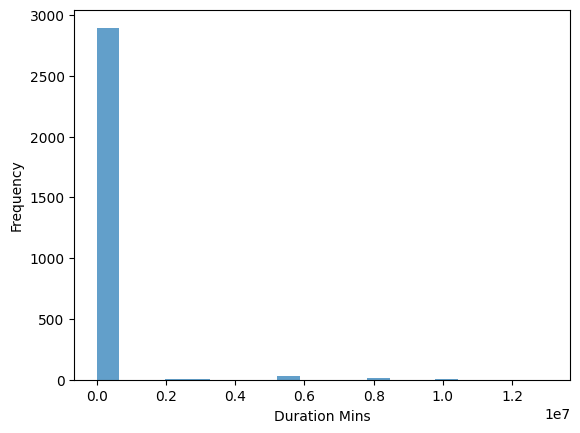

{('Inbound Call',): 2409,
 ('Inbound Call', 'Handle Case'): 95,
 ('Inbound Call', 'Inbound Call'): 248,
 ('Inbound Email', 'Email Outbound', 'Email Outbound'): 41,
 ('Inbound Email', 'Email Outbound'): 106,
 ('Inbound Call', 'Inbound Call', 'Inbound Call'): 54}

In [106]:
# Prime rimozioni con covergae:
filtered_log_var_coverage = pm4py.filter_variants_by_coverage_percentage(filtered_log, 0.01)
filtered_log_var_coverage
# We are filtering out 0.3 percent of our coverage. So it is 100% - 70%. 

case_dur = filtered_log_var_coverage.groupby('Case ID')['Duration'].sum()
print_duration_frequency(case_dur)

variants_coverage = pm4py.get_variants(filtered_log_var_coverage)
variants_coverage

#### Even playing with the filter_variants parameter it is not easy to filter out a small subset of the varints of a large...

#### Let's compute variant by variant by splitting them

In [108]:
#split the event log by variants, assigning them to global variables and then see it foreach specific variant

counter = 1 

for variant, subdf in pm4py.split_by_process_variant(filtered_log_var_coverage):
        #var name for the df based on counter
        var_name = f"variant{counter}"

        #new df var and assign the subdf to it
        globals()[var_name] = subdf

        counter += 1
        
final_counter = counter - 1

#print a specific variant:
print(variant2)

        Case ID      Activity                Start Date  \
5     Case 1000  Inbound Call 2010-04-03 14:11:00+00:00   
6     Case 1000   Handle Case 2010-04-03 14:12:00+00:00   
57    Case 1027  Inbound Call 2010-03-18 15:33:00+00:00   
58    Case 1027   Handle Case 2010-03-19 07:57:00+00:00   
299   Case 1140  Inbound Call 2010-03-14 09:29:00+00:00   
...         ...           ...                       ...   
7382   Case 918   Handle Case 2010-03-30 09:22:00+00:00   
7386   Case 920  Inbound Call 2010-03-15 10:25:00+00:00   
7387   Case 920   Handle Case 2010-03-18 06:55:00+00:00   
7491   Case 974  Inbound Call 2010-03-20 10:17:00+00:00   
7492   Case 974   Handle Case 2010-03-20 10:25:00+00:00   

                      End Date Agent Position   Customer ID             Topic  \
5    2010-04-03 14:12:00+00:00             FL  Customer 837           Queries   
6    2010-04-03 14:13:00+00:00             FL  Customer 837           Queries   
57   2010-03-18 15:39:00+00:00             FL  C

Variants --> variant1
Mean duration 232.62764632627648
Median duration 120.0
Mode duration 60
STDev duration 269.1171327612983


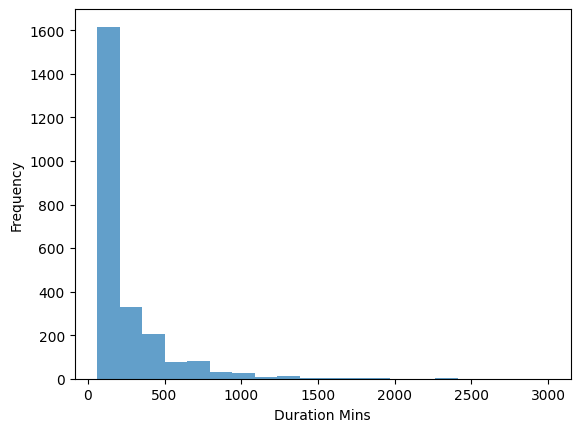

Variants --> variant2
Mean duration 622.7368421052631
Median duration 420.0
Mode duration 360
STDev duration 1267.158357251225


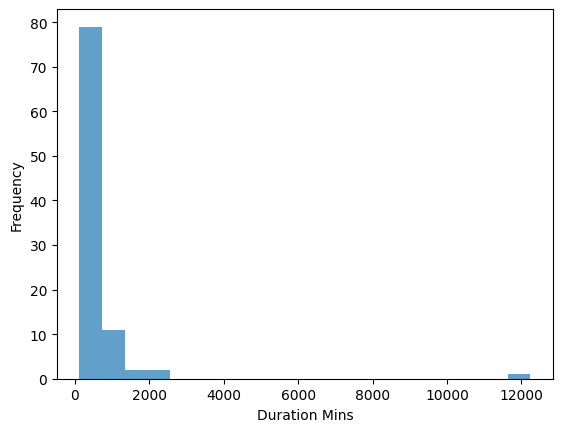

Variants --> variant3
Mean duration 568.5483870967741
Median duration 420.0
Mode duration 240
STDev duration 519.3186029927987


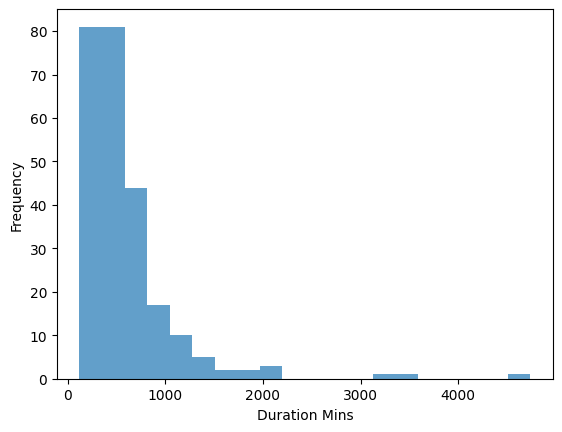

Variants --> variant4
Mean duration 1777090.243902439
Median duration 76080.0
Mode duration 2760
STDev duration 3263569.8410272207


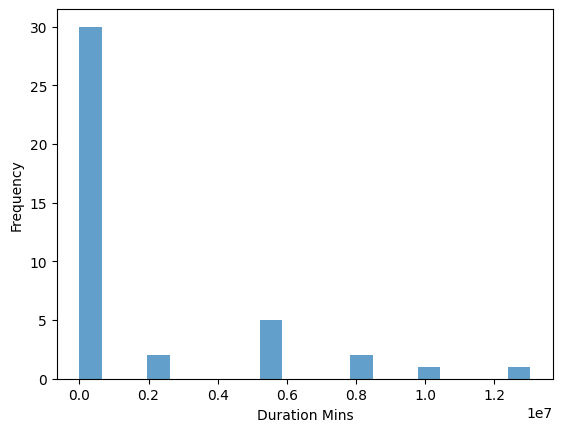

Variants --> variant5
Mean duration 2625648.113207547
Median duration 263670.0
Mode duration 600
STDev duration 3164994.348987993


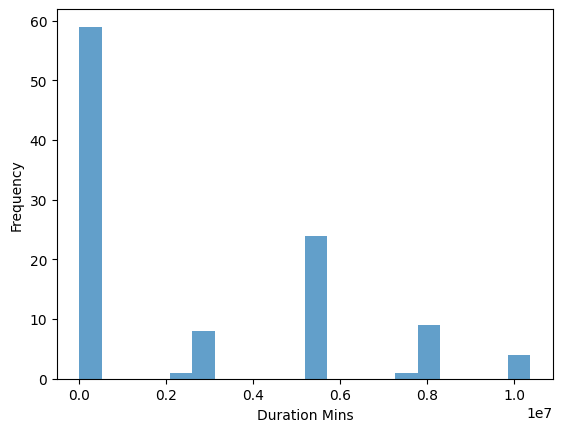

Variants --> variant6
Mean duration 934.4444444444445
Median duration 720.0
Mode duration 660
STDev duration 618.1337300100203


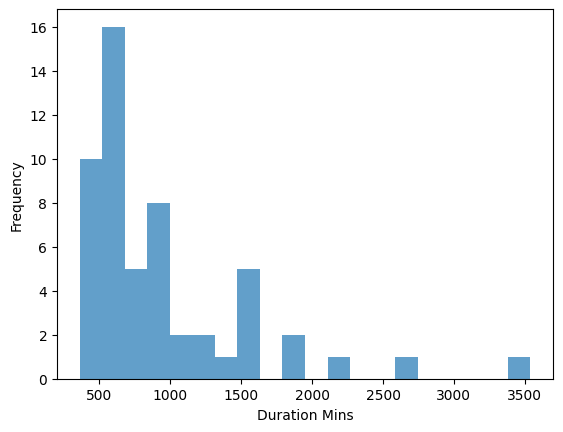

In [113]:
# print cycle time on variants

for i in range(1, final_counter + 1):
    var_name = f"variant{i}"
    
    var_df = globals()[var_name]
    
    case_durations_variant = var_df.groupby('Case ID')['Duration'].sum()
    
    print(f"Variants --> {var_name}")
    print_duration_frequency(case_durations_variant)